# Blackjack
- mazzo carte
    - mappare valore della carta su valore numerico e viversa
- mescolare e estrarre
- mostrare carte all'utente
- interazione con l'utente
- gestire l'uscita dal gioco
- gestire il banco
- decidere il vincitore

# Blackjack implementation

In [ ]:
from blackjack.game import Table, HumanPlayer

In [ ]:
table = Table()
p1 = HumanPlayer(name='Player1', capital=100.00, bet_rate=10.00)
p2 = HumanPlayer(name='Player2', capital=100.00, bet_rate=5.00)
table.add_players([p1, p2])

## Receive bets

In [ ]:
table.receive_bets(money=[12.0, 3.0])

In [ ]:
table.bets

## Serve players

In [ ]:
table.serve_players()

In [ ]:
table.dealer.hand, table.dealer.hand_value

In [ ]:
for player in table.players:
    print(player.hand, player.hand_value)

## Play

In [ ]:
table.play()

In [ ]:
table.dealer.hand, table.dealer.hand_value

In [ ]:
for player in table.players:
    print(player.hand, player.hand_value)

## Pay

In [ ]:
table.pay()

In [ ]:
for player in table.players:
    print(player.capital)

In [ ]:
table.history

In [ ]:
p2.history

# Exercise

1. Take a table capital

2. Implement an automatic player with a simple strategy and test it by running multiple episodes and recording the capital

## Automatic play

In [4]:
from blackjack.game import Table, HumanPlayer, DummyAIPlayer, RandomAIPlayer

In [5]:
table = Table()
table.add_players([
    DummyAIPlayer(name='Dummy', capital=100, bet_rate=10),
    RandomAIPlayer(name='Random', capital=100, bet_rate=10)
])

In [6]:
for i in range(20000):
    table.receive_bets()
    table.serve_players()
    table.play()
    table.pay()

In [7]:
for p in table.players:
    print(p.history[-6:])
table.history[-6:]

[90, 100, 110, 120, 110, 100]
[220, 230, 230, 240, 240, 250]


[-110, -130, -140, -160, -150, -150]

### Save in `numpy`

In [18]:
import numpy as np
import pandas as pd

In [9]:
stats = []
for p in table.players:
    stats.append(p.history)
stats.append(table.history)

In [10]:
S = np.array(stats)

In [11]:
S.shape

(3, 20001)

In [23]:
X = pd.DataFrame(S.T, columns=['dummy', 'random', 'table'], index=range(1, 20002))

In [45]:
X

,dummy,random,table
1,100,100,0
2,90,110,0
3,80,120,0
4,70,110,20
5,60,100,40
...,...,...,...
19997,100,230,-130
19998,110,230,-140
19999,120,240,-160
20000,110,240,-150


In [42]:
X[['dummy', 'table']].mean()

dummy    572.843858
table   -226.775661
dtype: float64

In [12]:
import matplotlib.pyplot as plt

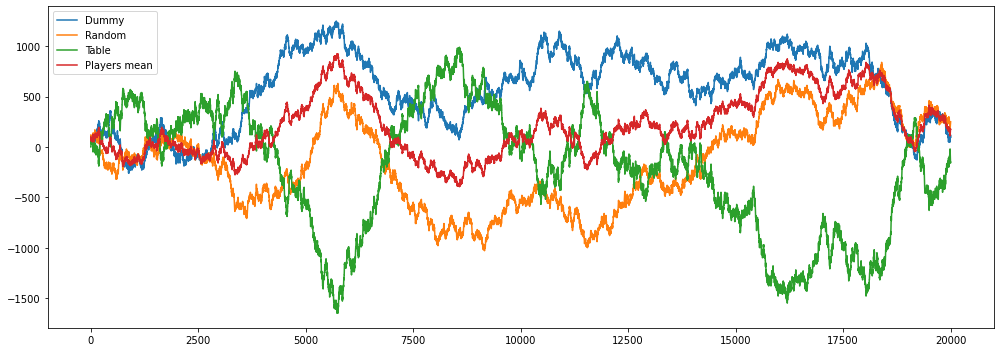

In [13]:
labels = ['Dummy', 'Random', 'Table']
fig, ax = plt.subplots(figsize=(14, 5))
for row in range(S.shape[0]):
    data = S[row,:]
    ax.plot(data, label = labels[row])
ax.plot(S[:2,:].mean(axis=0), label = 'Players mean')
ax.legend()
plt.tight_layout()
plt.show()